In [105]:
import os
import json
import torch
import pickle as pkl
from PIL import Image
import scipy.io as IO
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import torchvision.transforms as T

In [85]:
with open('predictions.pkl', 'rb') as fp:
    preds = pkl.load(fp)

with open('hico_20160224_det/coco_class_indices_contiguous.json', 'r') as fp:
    coco_indices = json.load(fp=fp)

coco_indices = {index: label for label, index in coco_indices.items()}

In [89]:
image_path, output, (scores, labels, boxes) = preds[0]

In [102]:
output['pred_logits'].softmax(-1)[0, :, :-1].max(-1).values > 0.5

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False,  True,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False])

In [104]:
boxes.shape

torch.Size([3, 4])

In [110]:
mat = IO.loadmat('hico_20160224_det/anno_bbox.mat', simplify_cells=True)

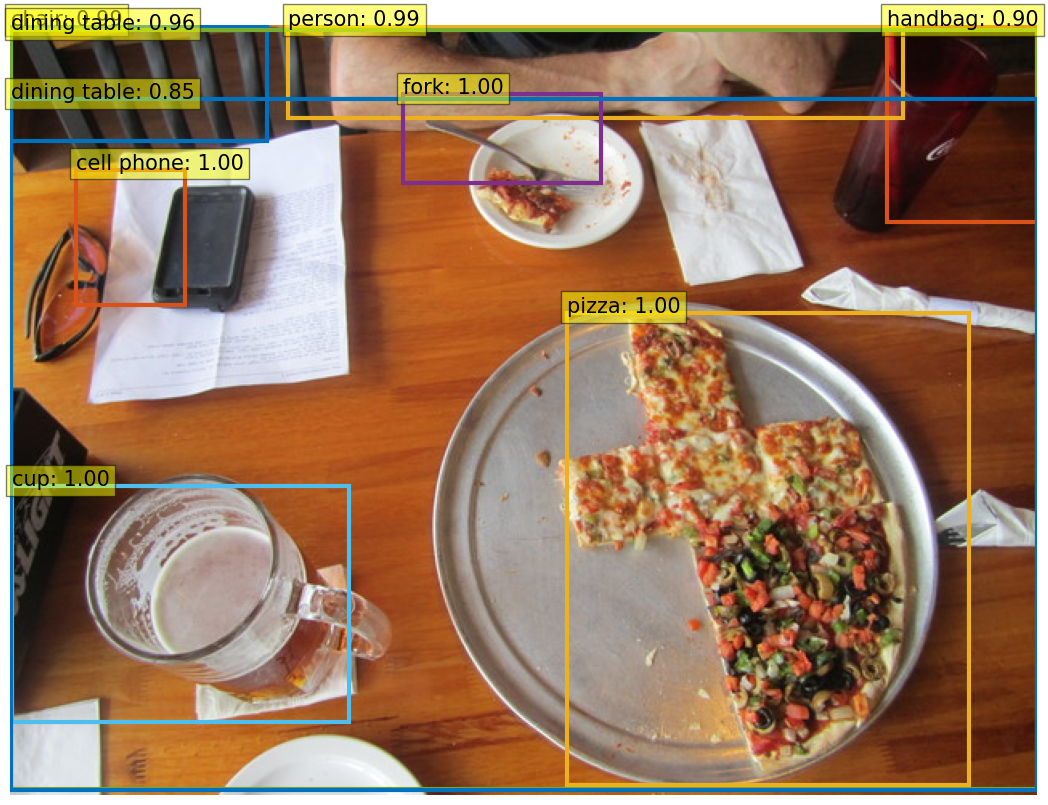

In [83]:
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

def plot_results(img_path, prob, labels, boxes):
    pil_img = Image.open(img_path)
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()
    for p, (xmin, ymin, xmax, ymax), l, c, in zip(prob, boxes.tolist(), labels, COLORS * 100):
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=c, linewidth=3))

        text = f'{coco_indices[l.item()]}: {p:0.2f}'
        ax.text(xmin, ymin, text, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()

image_path, probs, labels, bboxes = preds[9]
plot_results(image_path[0], probs, labels, bboxes)